In [1]:
## problemimiz Aslanları ve kaplanları ayırabilecek bir CNN uygulaması yapmak.
## her classın toplam 175 fotoğrafı vardır (toplamda 350) 
## fotoğrafların 140'i training'e 35'i validation'a ayrılmıştır.
## aşağıdaki linkten datalara ulaşabiliriz.
## https://drive.google.com/drive/folders/1pzGd11QvxA9F-OHWwPId8-UeWiRCHgD7?usp=sharing

#### İLK ADIM ####
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def showGraph(history): ## GRAFİK GÖSTERME ÇOK KULLANACAĞIMIZDAN FONSKİYON OLARAK YAZDIK
    plt.axis([-1, 20, 0, 1.1])


    plt.xticks(np.arange(0,21, 5.0))


    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc))


    plt.plot(epochs,acc,'bo',label='Training_acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.axis([-1, 20, 0, 1.5])
    plt.xticks(np.arange(0,21, 5.0))
    plt.plot(epochs,loss,'bo',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os

print(os.getcwd())
 

train_dir= os.getcwd() + r'\FinalData\train'
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                             train_dir,
target_size=(150,150),
batch_size=5,
class_mode='binary')

validation_dir= os.getcwd() + r'\FinalData\validation'
validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=5,
class_mode='binary')

C:\Users\Berke\Desktop\ae
Found 280 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [5]:
firstHistory=model.fit_generator( ## NORMAL FİT
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/20
100/100 [==============================] - 13s 128ms/step - loss: 0.5611 - acc: 0.6920 - val_loss: 0.2144 - val_acc: 0.9320
Epoch 2/20
100/100 [==============================] - 13s 132ms/step - loss: 0.3657 - acc: 0.8560 - val_loss: 0.5086 - val_acc: 0.9200
Epoch 3/20
100/100 [==============================] - 13s 127ms/step - loss: 0.2998 - acc: 0.8800 - val_loss: 0.2096 - val_acc: 0.9280
Epoch 4/20
100/100 [==============================] - 13s 131ms/step - loss: 0.2438 - acc: 0.9080 - val_loss: 0.1571 - val_acc: 0.7120
Epoch 5/20
100/100 [==============================] - 13s 126ms/step - loss: 0.2460 - acc: 0.9040 - val_loss: 0.0810 - val_acc: 0.9400
Epoch 6/20
100/100 [==============================] - 13s 134ms/step - loss: 0.2119 - acc: 0.9140 - val_loss: 0.9226 - val_acc: 0.8480
Epoch 7/20
100/100 [==============================] - 13s 130ms/step - loss: 0.1926 - acc: 0.9280 - val_loss: 0.0466 - val_acc: 0.9600
Epoch 8/20
100/100 [==============================] - 1

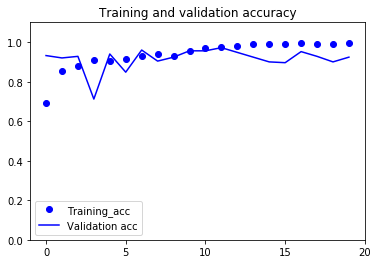

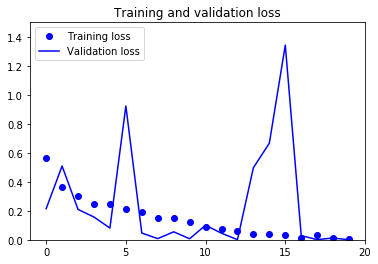

In [6]:
import matplotlib.pyplot as plt
import numpy as np

showGraph(firstHistory)  ## NORMAL GRAFİK

In [7]:
## YORUMLAR
print("Accuracy çok yüksek ve epoch ilerledikçe accuracy'miz yükseliyor, burası iyi")
print("Training loss genel olarak epoch boyunca düşmeye gidiyor ve sonlara doğru stabilize oluyor,istediğimiz gibi grafik çiziyor")
print("Ama Validation loss Training loss paralel değil bazı noktalarda sıçrama yapıyor, daha iyi olabilirdi")
print("Bu duruma, araştırdığıma göre \"Unrepresentative Validation Dataset\" deniyor. ")
print("Ve bu durum aşağıdaki sebepten ötürü oluşuyor.")
print("Validation dataseti train data setine göre küçük olduğundan veya o datasete göre tahmin etmesi daha kolay olduğundan bu sıçramalara sebep olabilir")
print("Kaynak: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/")

Accuracy çok yüksek ve epoch ilerledikçe accuracy'miz yükseliyor, burası iyi
Training loss genel olarak epoch boyunca düşmeye gidiyor ve sonlara doğru stabilize oluyor,istediğimiz gibi grafik çiziyor
Ama Validation loss Training loss paralel değil bazı noktalarda sıçrama yapıyor, daha iyi olabilirdi
Bu duruma, araştırdığıma göre "Unrepresentative Validation Dataset" deniyor. 
Ve bu durum aşağıdaki sebepten ötürü oluşuyor.
Validation dataseti train data setine göre küçük olduğundan veya o datasete göre tahmin etmesi daha kolay olduğundan bu sıçramalara sebep olabilir
Kaynak: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/


In [8]:
#### İKİNCİ ADIM ####

aug_train_datagen=ImageDataGenerator(  ## AUGMENT YAPIYORUZ
rescale=1./255,
rotation_range=40,
width_shift_range=.2,
height_shift_range=.2,
shear_range=.2,
zoom_range=.2,
horizontal_flip=True)

In [9]:
train_generator=aug_train_datagen.flow_from_directory(
                             train_dir,
target_size=(150,150),
batch_size=5,
class_mode='binary')


validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=5,
class_mode='binary')

Found 280 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [10]:
secondHistory=model.fit_generator( ## AUGMENT FİT
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/20
100/100 [==============================] - 15s 147ms/step - loss: 0.4471 - acc: 0.8600 - val_loss: 0.3375 - val_acc: 0.9320
Epoch 2/20
100/100 [==============================] - 15s 148ms/step - loss: 0.2940 - acc: 0.8800 - val_loss: 0.0317 - val_acc: 0.9720
Epoch 3/20
100/100 [==============================] - 14s 141ms/step - loss: 0.2685 - acc: 0.9020 - val_loss: 0.2887 - val_acc: 0.9560
Epoch 4/20
100/100 [==============================] - 15s 146ms/step - loss: 0.2479 - acc: 0.8960 - val_loss: 0.0579 - val_acc: 0.9160
Epoch 5/20
100/100 [==============================] - 14s 141ms/step - loss: 0.1966 - acc: 0.9220 - val_loss: 0.0146 - val_acc: 0.9600
Epoch 6/20
100/100 [==============================] - 15s 152ms/step - loss: 0.2059 - acc: 0.9220 - val_loss: 0.1271 - val_acc: 0.9200
Epoch 7/20
100/100 [==============================] - 14s 143ms/step - loss: 0.2056 - acc: 0.9240 - val_loss: 0.0956 - val_acc: 0.8840
Epoch 8/20
100/100 [==============================] - 1

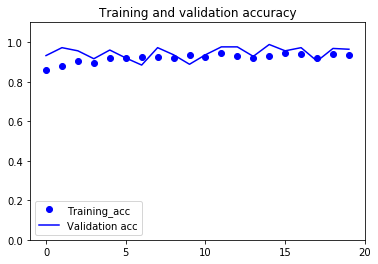

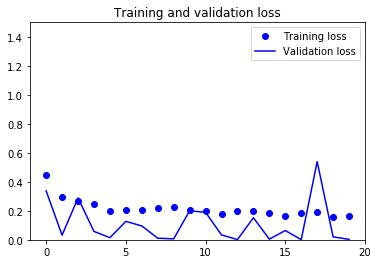

In [11]:
showGraph(secondHistory) ## AUGMENT GRAFİĞİ

In [12]:
## YORUMLAR
print("Modelimiz Augment edilen dataları tahmin etmekte birazcık daha zorlandı diyebiliriz (accuracy biraz düştü)")
print("Ama validation acc ve accuracy daha paralel görünüyor")
print("Training loss miktar olarak yükseldi ancak eğrisi hala aşağı gidiyor")
print("Augment edilmiş datalara rağmen Unrepresentative Validation Dataset durumu geçmedi ama iyileşti")
print("Validation loss bir yer hariç sıçramalarında aralığında azalma var")

Modelimiz Augment edilen dataları tahmin etmekte birazcık daha zorlandı diyebiliriz (accuracy biraz düştü)
Ama validation acc ve accuracy daha paralel görünüyor
Training loss miktar olarak yükseldi ancak eğrisi hala aşağı gidiyor
Augment edilmiş datalara rağmen Unrepresentative Validation Dataset durumu geçmedi ama iyileşti
Validation loss bir yer hariç sıçramalarında aralığında azalma var


In [13]:
#### ÜÇÜNCÜ ADIM ####

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))                            ##   MODELE DROPOUT EKLEDİK
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [14]:
thirdHistory=model.fit_generator(  ## AUGMENT + DROP OUT FİT
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/20
100/100 [==============================] - 15s 149ms/step - loss: 0.5452 - acc: 0.7240 - val_loss: 0.0866 - val_acc: 0.9240
Epoch 2/20
100/100 [==============================] - 15s 145ms/step - loss: 0.3931 - acc: 0.8200 - val_loss: 0.1526 - val_acc: 0.8760
Epoch 3/20
100/100 [==============================] - 14s 142ms/step - loss: 0.3691 - acc: 0.8540 - val_loss: 0.1304 - val_acc: 0.8720
Epoch 4/20
100/100 [==============================] - 14s 141ms/step - loss: 0.3529 - acc: 0.8500 - val_loss: 0.2214 - val_acc: 0.8920
Epoch 5/20
100/100 [==============================] - 14s 140ms/step - loss: 0.3399 - acc: 0.8560 - val_loss: 0.4525 - val_acc: 0.8640
Epoch 6/20
100/100 [==============================] - 16s 157ms/step - loss: 0.3139 - acc: 0.8700 - val_loss: 0.0214 - val_acc: 0.9240
Epoch 7/20
100/100 [==============================] - 14s 141ms/step - loss: 0.2920 - acc: 0.8780 - val_loss: 0.0787 - val_acc: 0.9000
Epoch 8/20
100/100 [==============================] - 1

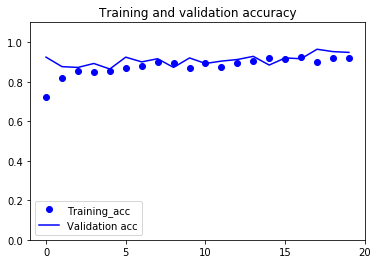

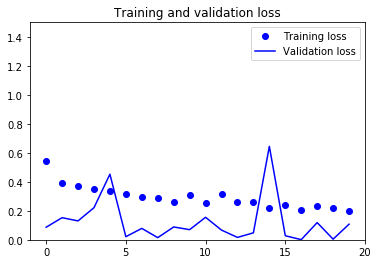

In [15]:
showGraph(thirdHistory) ## AUGMENT + DROP OUT GRAFİĞİ

In [16]:
## YORUMLAR
print("Drop out modelin Accuracy olarak düşmesine sebep oldu")
print("Training loss eğrisi aşağı yönde")
print("Dropout ile Unrepresentative Validation Dataset durumu geçmedi ama daha da iyileşti")
print("Bu yüzden Validation loss'ta hala sıçramalar var ama önceki grafiklere göre daha iyi duruyor")

Drop out modelin Accuracy olarak düşmesine sebep oldu
Training loss eğrisi aşağı yönde
Dropout ile Unrepresentative Validation Dataset durumu geçmedi ama daha da iyileşti
Bu yüzden Validation loss'ta hala sıçramalar var ama önceki grafiklere göre daha iyi duruyor


In [17]:
#### DÖRDÜNCÜ ADIM ####

fourthHistory=model.fit_generator( ## AUGMENT + DROP OUT + ERKEN EPOCH'TA KESME FİT
train_generator,
steps_per_epoch=100,
epochs=10,                         ## 10. EPOCH'DA KESTİK
validation_data=validation_generator,
validation_steps=50)

Epoch 1/10
100/100 [==============================] - 15s 146ms/step - loss: 0.2633 - acc: 0.8980 - val_loss: 0.0996 - val_acc: 0.9120
Epoch 2/10
100/100 [==============================] - 15s 147ms/step - loss: 0.1986 - acc: 0.9240 - val_loss: 0.5983 - val_acc: 0.7840
Epoch 3/10
100/100 [==============================] - 14s 141ms/step - loss: 0.1990 - acc: 0.9360 - val_loss: 0.0012 - val_acc: 0.9200
Epoch 4/10
100/100 [==============================] - 14s 144ms/step - loss: 0.2209 - acc: 0.9240 - val_loss: 0.0728 - val_acc: 0.9440
Epoch 5/10
100/100 [==============================] - 14s 143ms/step - loss: 0.2022 - acc: 0.9240 - val_loss: 0.1907 - val_acc: 0.9240
Epoch 6/10
100/100 [==============================] - 15s 151ms/step - loss: 0.1813 - acc: 0.9300 - val_loss: 0.5493 - val_acc: 0.9200
Epoch 7/10
100/100 [==============================] - 14s 139ms/step - loss: 0.1810 - acc: 0.9340 - val_loss: 0.0076 - val_acc: 0.9000
Epoch 8/10
100/100 [==============================] - 1

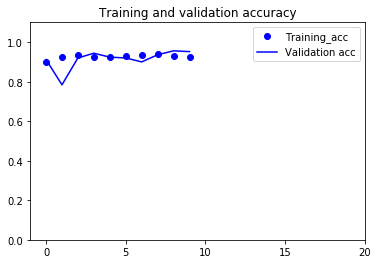

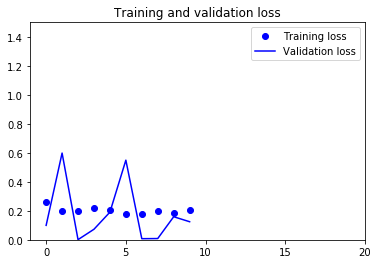

In [18]:
showGraph(fourthHistory) ## AUGMENT + DROP OUT + ERKEN EPOCH'TA KESME GRAFİĞİ

In [19]:
## YORUMLAR
print("Epoch'umuzu 20 den 10 a indirince validation loss çok daha stabil bir eğri çizdi")
print("Accuracy'miz hala yüksek")
print("Ama training loss ile paralel değil, dolayısıyla modelimiz good fit demek demek tam doğru olmayabilir.")

Epoch'umuzu 20 den 10 a indirince validation loss çok daha stabil bir eğri çizdi
Accuracy'miz hala yüksek
Ama training loss ile paralel değil, dolayısıyla modelimiz good fit demek demek tam doğru olmayabilir.
